In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate a dataset

In [ ]:
no_trans = np.random.randint(low = 24, high=1032, size = 300)

In [ ]:
no_trans2= np.random.randint(low= 3400, high = 10324, size=450)

In [ ]:
n_trans = np.concatenate((no_trans, no_trans2))

In [ ]:
np.random.shuffle(n_trans)

In [ ]:
payments = np.random.randint(low = 24, high=1032, size = 300)
payments2= np.random.randint(low= 3400, high = 103242, size=450)
pays = np.concatenate((payments, payments2))
np.random.shuffle(pays)

In [ ]:
start_date = np.datetime64('2023-01')
months = np.array([start_date + np.timedelta64(i, 'M') for i in range(15)])
date_time = np.tile(months, 50)

In [ ]:
num_clients = 50
clients_ids = np.repeat(np.arange(1, num_clients+1), len(months))

In [ ]:
length = 750
categories = [0, 1]
probabilities = [0.81, 0.19]

churn_under = np.random.choice(categories, size=length, p=probabilities)
churn_over = np.random.choice(categories, size=length, p=probabilities[::-1])


In [ ]:
churn_clients = pd.DataFrame(data={"date_from": date_time, 'client_id': clients_ids, 'no_transactions': n_trans, 'vol_transactions': pays, 'churs_us': churn_under, 'churn_os': churn_over})

In [ ]:
churn_clients

,date_from,client_id,no_transactions,vol_transactions,churs_us,churn_os
0,2023-01-01,1,629,46545,0,0
1,2023-02-01,1,161,925,0,1
2,2023-03-01,1,8350,30692,0,1
3,2023-04-01,1,3915,46637,0,1
4,2023-05-01,1,949,29005,0,1
...,...,...,...,...,...,...
745,2023-11-01,50,9467,57229,0,1
746,2023-12-01,50,9682,190,0,1
747,2024-01-01,50,910,463,1,1
748,2024-02-01,50,7958,1027,1,1


## Standardization si Scalling

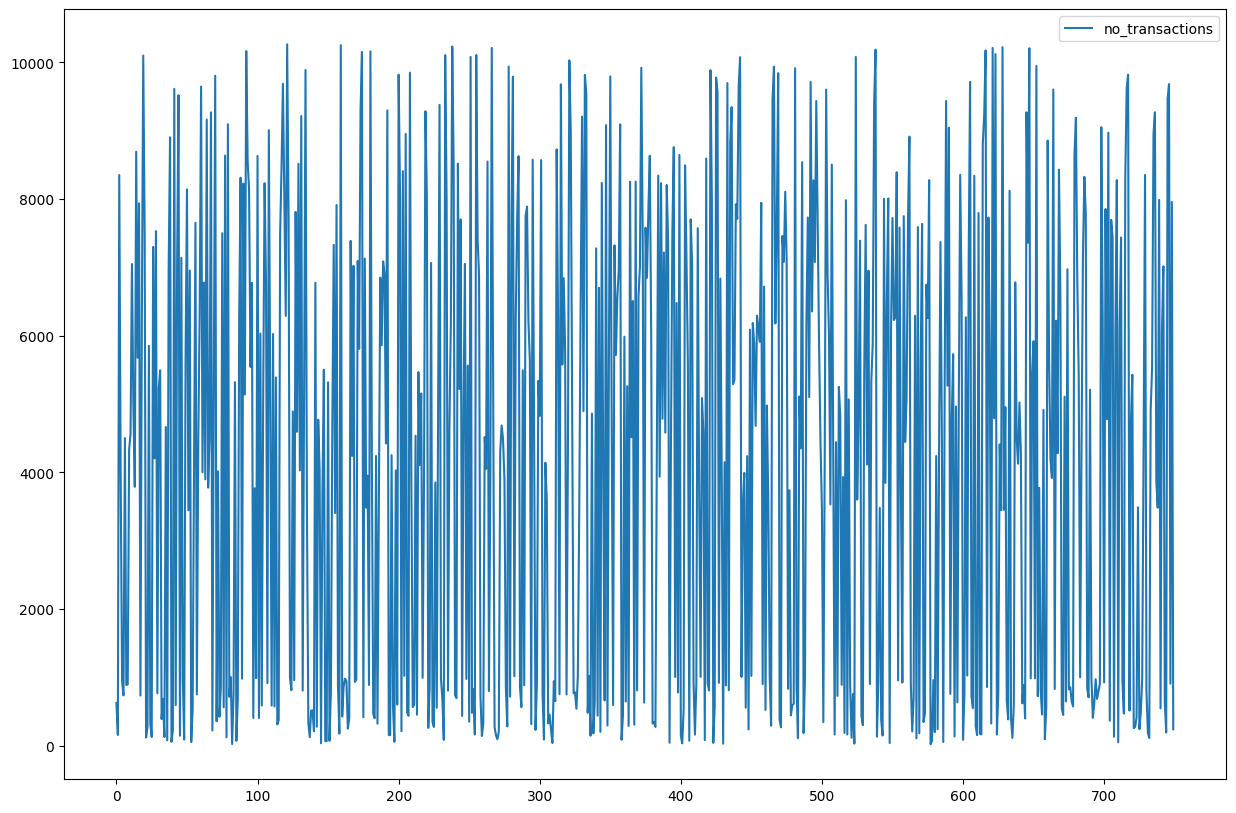

In [ ]:
churn_clients.plot(y='no_transactions', kind='line', figsize=(15, 10))
plt.show()

In [ ]:
## De ce e bine sa scalam datele?
## Diferentele prea mari intre valori pot genera instabilitate numerica in cadrul antrenarii modelului
## Daca unele caracteristici au valori mult mai mari fata de celelalte, acestea vor domina in procesul de antrenare, si astfel vor reduce importanta caracteristicilor cu valori mai mici

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()
standard_no_tran = scaler.fit_transform(churn_clients[['no_transactions']])
## Alternativaplicam formula: (churn_clients['no_transactions'] - churn_clients['no_transactions'].mean())/ churn_clients['no_transactions'].std()

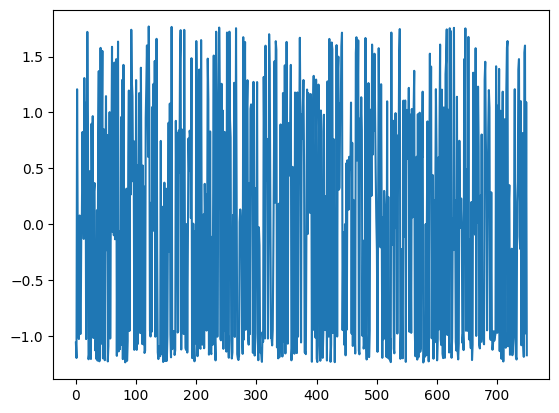

In [ ]:
plt.plot(standard_no_tran)
plt.show()

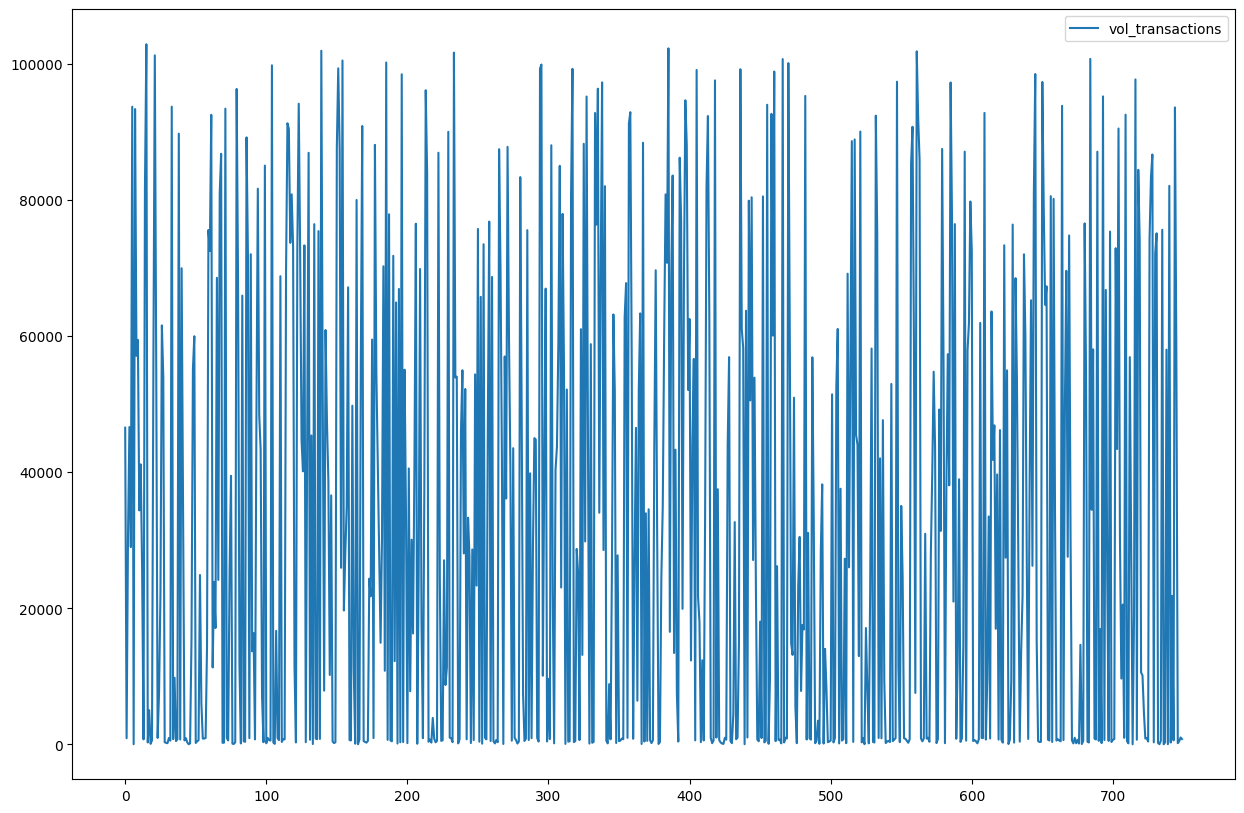

In [ ]:
churn_clients.plot(y='vol_transactions', kind='line', figsize=(15, 10))
plt.show()

In [ ]:
min_max_scaler = MinMaxScaler()
mix_max_vol_trans = min_max_scaler.fit_transform(churn_clients[['vol_transactions']])
## Alternativ folosim formula: (churn_clients['vol_transactions'] - churn_clients['vol_transactions'].min()) / (churn_clients['vol_transactions'].max() - churn_clients['vol_transactions'].min())

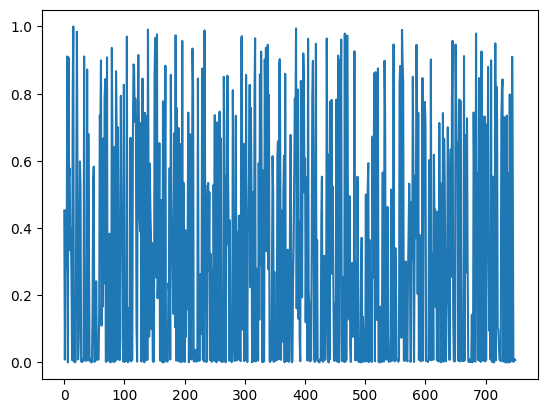

In [ ]:
plt.plot(mix_max_vol_trans)
plt.show()

In [ ]:
churn_clients.loc[:, 'no_transactions'] = standard_no_tran
churn_clients.loc[:, 'vol_transactions'] = mix_max_vol_trans

<ipython-input-84-0b2b7772c4bf>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.05786684e+00 -1.19517721e+00  1.20746082e+00 -9.37602913e-02
 -9.63979413e-01 -1.02559304e+00  7.87578623e-02 -9.80996510e-01
 -9.78062528e-01  2.94669613e-02  9.81221448e-02  8.25749731e-01
  2.21642796e-01 -1.30435069e-01  1.30780301e+00  4.23500771e-01
  1.08628735e+00 -1.02617984e+00  5.97485916e-01  1.72061430e+00
  9.61299709e-01 -1.20661974e+00 -1.16055622e+00  4.74845460e-01
 -1.14823350e+00 -1.20427256e+00  8.99099287e-01 -8.08801094e-03
  9.67167674e-01 -1.01649769e+00  2.92938563e-01  3.69222101e-01
 -1.12710882e+00 -1.04055635e+00 -1.20427256e+00  1.26288374e-01
 -1.21864907e+00  7.94356122e-01  1.36971003e+00 -1.22481043e+00
 -1.17522613e+00  1.57772937e+00 -1.06754898e+00  8.26043130e-01
  1.55044334e+00 -1.19840459e+00  8.52155571e-01 -9.44908529e-01
 -1.21512829e+00  4.30835727e-01  1.14614059e+00 -2.31070658e-01
  

In [ ]:
churn_clients

,date_from,client_id,no_transactions,vol_transactions,churs_us,churn_os
0,2023-01-01,1,-1.057867,0.452284,0,0
1,2023-02-01,1,-1.195177,0.008722,0,1
2,2023-03-01,1,1.207461,0.298146,0,1
3,2023-04-01,1,-0.093760,0.453179,0,1
4,2023-05-01,1,-0.963979,0.281743,0,1
...,...,...,...,...,...,...
745,2023-11-01,50,1.535187,0.556165,0,1
746,2023-12-01,50,1.598267,0.001575,0,1
747,2024-01-01,50,-0.975422,0.004230,1,1
748,2024-02-01,50,1.092449,0.009713,1,1


## Undersampling

In [ ]:
churn_clients.loc[:, ~churn_clients.columns.isin(['churn_os'])]

,date_from,client_id,no_transactions,vol_transactions,churs_us
0,2023-01-01,1,-1.233558,0.003588,0
1,2023-02-01,1,0.208649,0.006885,0
2,2023-03-01,1,0.002702,0.000882,0
3,2023-04-01,1,1.131674,0.219797,0
4,2023-05-01,1,-0.955990,0.008136,1
...,...,...,...,...,...
745,2023-11-01,50,0.694755,0.006779,0
746,2023-12-01,50,-1.135762,0.000320,1
747,2024-01-01,50,0.868774,0.684429,0
748,2024-02-01,50,-1.122531,0.545618,1


In [ ]:
churn_clients_us = churn_clients.loc[:, ~churn_clients.columns.isin(['churn_os'])]

In [ ]:
churn_clients_us.loc[:, 'churs_os'] = churn_clients_us.churs_us.astype('str')

[]

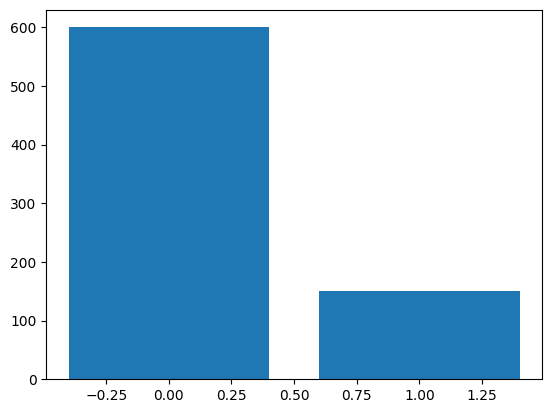

In [ ]:
plt.bar(x = churn_clients_us.churs_us.value_counts().index, height = churn_clients_us.churs_us.value_counts().values)
plt.plot()

In [ ]:
churn_clients_us.churs_us.value_counts()

,count
churs_us,
0,600
1,150


In [ ]:
## Vreau sa reduc numarul de date care are eticheta 0 cu cel al datelor care au eticheta 1

In [ ]:
## Random Undersampling
## Selecteaza valori aleatorii din clasa majoritara in numar al clasei minoritare
## Avatanje
## Este rapid (pe langa faptul ca ne reduce setul de date)
## Poate elimina informatii utile din clasa majoritara, ceea ce poate duce la pierderea de variatie
## Nu putem controla ce informatie se elimina -> poate limita generalizarea modelului

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X = churn_clients_us.drop(columns=['churs_us'])
y = churn_clients_us.churs_us
X_resampled, y_resampled = rus.fit_resample(X, y)

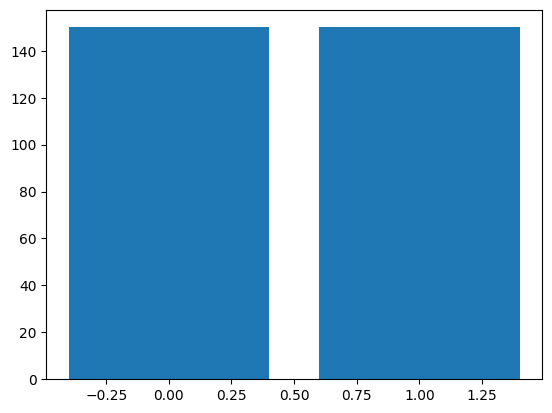

In [ ]:
plt.bar(x=y_resampled.value_counts().index, height=y_resampled.value_counts().values)
plt.show()

In [ ]:
## Undersample cu Tomek Links
## Elimina exemplele din clasa majoritara care sunt cele mai apropiate (in termen de distanta) de exemplele din clasa minoritara
## Avantaje
## Pastreaza exemplele informative ale clasei majoritare
## Defineste o separabilitate mai buna intre clase
## Dezavantaje
## Lenta pentru seturi mari de date
## Nu reduce de cele mai multe ori dimensiunea datelor cu un numar semnificativ

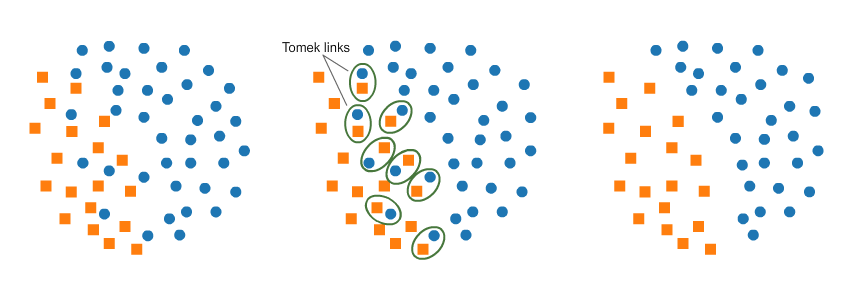

In [ ]:
from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()
X = churn_clients_us.drop(columns=['churs_us', 'date_from', 'client_id'])
y = churn_clients_us.churs_us
X_resampled, y_resampled = t1.fit_resample(X, y)

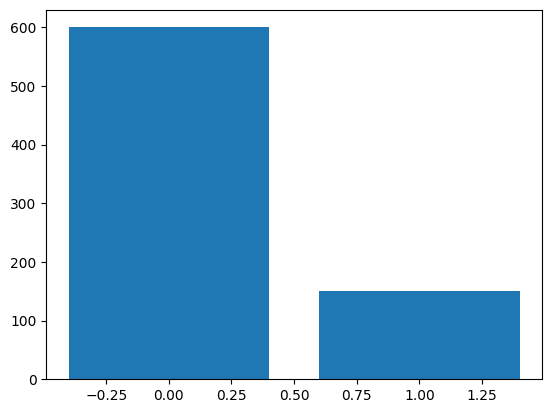

In [ ]:
plt.bar(x=y_resampled.value_counts().index, height=y_resampled.value_counts().values)
plt.show()

In [ ]:
y_resampled.value_counts()

,count
churs_us,
0,600
1,150


In [ ]:
## Near Miss
## Este o metoda bazata pe distante care pastreaza doar eemplele din clasa majoritara care sunt cele mai apropiate de clasa minoritara
## Avantaje
## Pastreaza exemplele apropiate de granita de decizie (ajuta modelul sa generalizele mai bine)
## Este lent
## Poate pierde din exemple semnificative din clasa majoritara

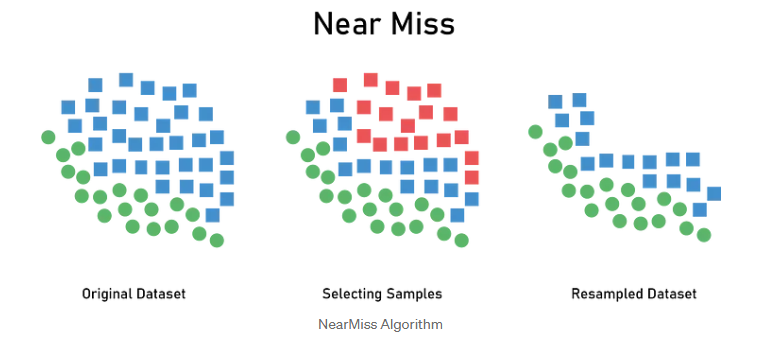

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
X = churn_clients_us.drop(columns=['churs_us', 'date_from', 'client_id'])
y = churn_clients_us.churs_us
X_resampled, y_resampled = nm.fit_resample(X, y)

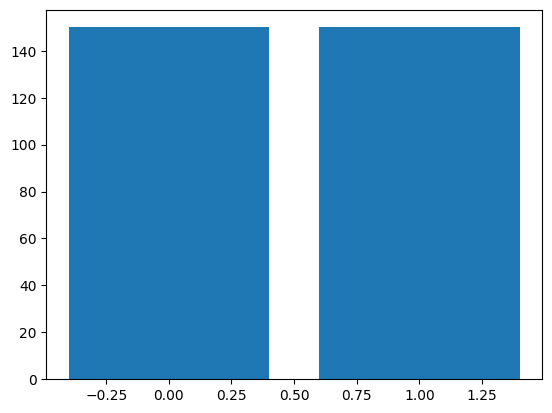

In [ ]:
plt.bar(x=y_resampled.value_counts().index, height=y_resampled.value_counts().values)
plt.show()

## Oversampling

In [ ]:
## SMOTE (Synthetic minority oversampling technique)
## Genereaza exemple noi sintetice prin dinterpolare liniara intre exemplele din clasa minoritara
## Avantaje
## Introduce diversitate in clasa minoritara
## Dezavantaje
## Poate genera exemple care nu reflecta bine distributia datelor
## Poate duce la crearea de exemple sintetice in zona de separare intre clase

In [ ]:
churn_clients

,date_from,client_id,no_transactions,vol_transactions,churs_us,churn_os
0,2023-01-01,1,-1.233558,0.003588,0,1
1,2023-02-01,1,0.208649,0.006885,0,1
2,2023-03-01,1,0.002702,0.000882,0,0
3,2023-04-01,1,1.131674,0.219797,0,1
4,2023-05-01,1,-0.955990,0.008136,1,1
...,...,...,...,...,...,...
745,2023-11-01,50,0.694755,0.006779,0,1
746,2023-12-01,50,-1.135762,0.000320,1,1
747,2024-01-01,50,0.868774,0.684429,0,0
748,2024-02-01,50,-1.122531,0.545618,1,1


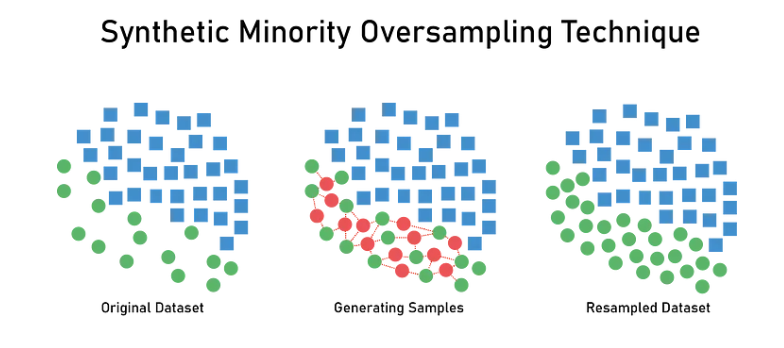

In [ ]:
churn_clients_os = churn_clients.drop(columns=['churs_us'])


In [ ]:
churn_clients_os

,date_from,client_id,no_transactions,vol_transactions,churn_os
0,2023-01-01,1,-1.057867,0.452284,0
1,2023-02-01,1,-1.195177,0.008722,1
2,2023-03-01,1,1.207461,0.298146,1
3,2023-04-01,1,-0.093760,0.453179,1
4,2023-05-01,1,-0.963979,0.281743,1
...,...,...,...,...,...
745,2023-11-01,50,1.535187,0.556165,1
746,2023-12-01,50,1.598267,0.001575,1
747,2024-01-01,50,-0.975422,0.004230,1
748,2024-02-01,50,1.092449,0.009713,1


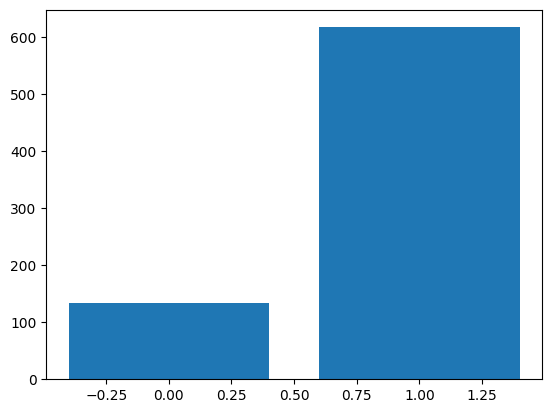

In [ ]:
plt.bar(x=churn_clients_os.churn_os.value_counts().index, height=churn_clients_os.churn_os.value_counts().values)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X = churn_clients_us.drop(columns=['churn_os', 'date_from', 'client_id'])
y = churn_clients_us.churn_os
X_resampled, y_resampled = smote.fit_resample(X, y)

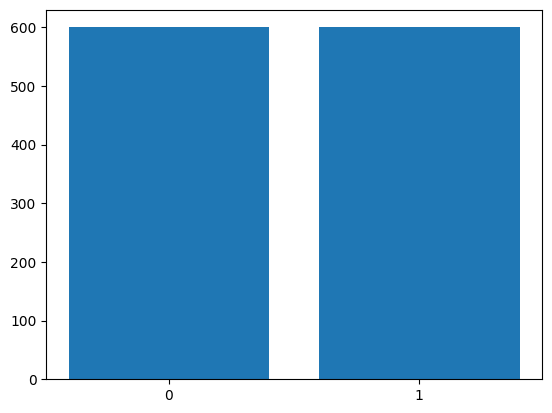

In [ ]:
plt.bar(x=y_resampled.value_counts().index, height=y_resampled.value_counts().values)
plt.show()

In [ ]:
## ADASYN (Adaptive Synthetic Sampling)
## O alta varianta a SMOTE, genereaza mai multe exemple sintetice in zonele in care clasa minoritara este subreprezentata si mai putine in zonele unde densitatea este mare
## Avantaje
## Reduce decalajul intre clase
## Dezavantaje
## Este lent
## Poate genera exemple care nu reflecta bine distributia datelor

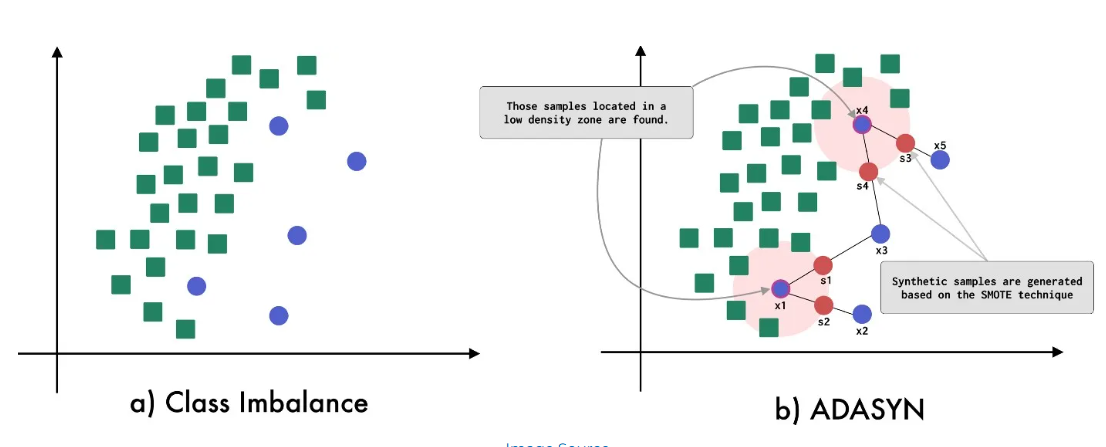

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X = churn_clients_us.drop(columns=['churn_os', 'date_from', 'client_id'])
y = churn_clients_us.churn_os
X_resampled, y_resampled = adasyn.fit_resample(X, y)

RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

## Time Series processing

In [ ]:
## Interpolare

In [ ]:
for client_id, group in churn_clients.groupby('client_id'):
  group = group.sort_values('date_from')

  before = group[group['date_from'] < pd.Timestamp('2023-07-01')].iloc[-1]
  after = group[group['date_from'] > pd.Timestamp('2023-07-01')].iloc[0]

  x1, y1 = before['date_from'], before[['no_transactions', 'vol_transactions']]
  x2, y2 = after['date_from'], after[['no_transactions', 'vol_transactions']]

  x = pd.Timestamp('2023-07-01')
  interpolated_values = y1 + (x-x1)/ (x2-x1) * (y2 - y1)

  interpolated_row = {
      'date_from' : x,
      'client_id' : client_id,
      'no_transactions': interpolated_values['no_transactions'],
      'vol_transactions': interpolated_values['vol_transactions']

  }

  print(interpolated_row)
  break


{'date_from': Timestamp('2023-07-01 00:00:00'), 'client_id': 1, 'no_transactions': -1.0036603199275667, 'vol_transactions': 0.9091274826105884}


In [ ]:
churn_clients.head(8)

,date_from,client_id,no_transactions,vol_transactions,churs_us,churn_os
0,2023-01-01,1,-1.057867,0.452284,0,0
1,2023-02-01,1,-1.195177,0.008722,0,1
2,2023-03-01,1,1.207461,0.298146,0,1
3,2023-04-01,1,-0.093760,0.453179,0,1
4,2023-05-01,1,-0.963979,0.281743,0,1
5,2023-06-01,1,-1.025593,0.910792,0,1
6,2023-07-01,1,0.078758,0.000097,1,1
7,2023-08-01,1,-0.980997,0.907408,0,1


In [ ]:
## Aplicam deseori interpolare pentru valori lipsa sau valori care sunt outliere

In [ ]:
## Agregare

In [ ]:
churn_clients['quarter_group'] = churn_clients.groupby('client_id').cumcount() // 3 + 1
aggregated_df = churn_clients.groupby(['client_id', 'quarter_group'])[['no_transactions', 'no_transactions']].sum().reset_index()
print(aggregated_df.head(10))

   client_id  quarter_group  no_transactions  no_transactions
0          1              1        -1.045583        -1.045583
1          1              2        -2.083333        -2.083333
2          1              3        -1.880301        -1.880301
3          1              4         0.953339         0.953339
4          1              5         1.399011         1.399011
5          2              1         0.483608         0.483608
6          2              2         3.279400         3.279400
7          2              3        -1.892331        -1.892331
8          2              4        -1.453407        -1.453407
9          2              5        -0.057418        -0.057418
